!/usr/bin/fenv python3.7<br>
-*- coding: utf-8 -*-

In [1]:
from urllib               import request
from collections          import Counter
from wordcloud            import WordCloud
from nltk.tokenize        import word_tokenize
from nltk.corpus          import stopwords

import numpy              as np
import matplotlib.pyplot  as plt

import random
import nltk
import requests

__author__ = "Christoph Hartleb"<br>
__copyright__ = "Copyright 2019"<br>
__credits__ = ["Christoph Hartleb"]<br>
__version__ = "1.0.1"<br>
__email__ = "14hartle@edu.uni-graz.at"<br>
__status__ = "Production"

In [2]:
URL = 'http://www.gutenberg.org/cache/epub/24681/pg24681.txt'

RESPONSE = request.urlopen(URL)
RAW = RESPONSE.read().decode('utf8')

for char in '-.,\n;:?=)(/&%$§"!)12345678':
    RAW = RAW.replace(char, ' ')

data = RAW
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

# Generate a Wordcloud

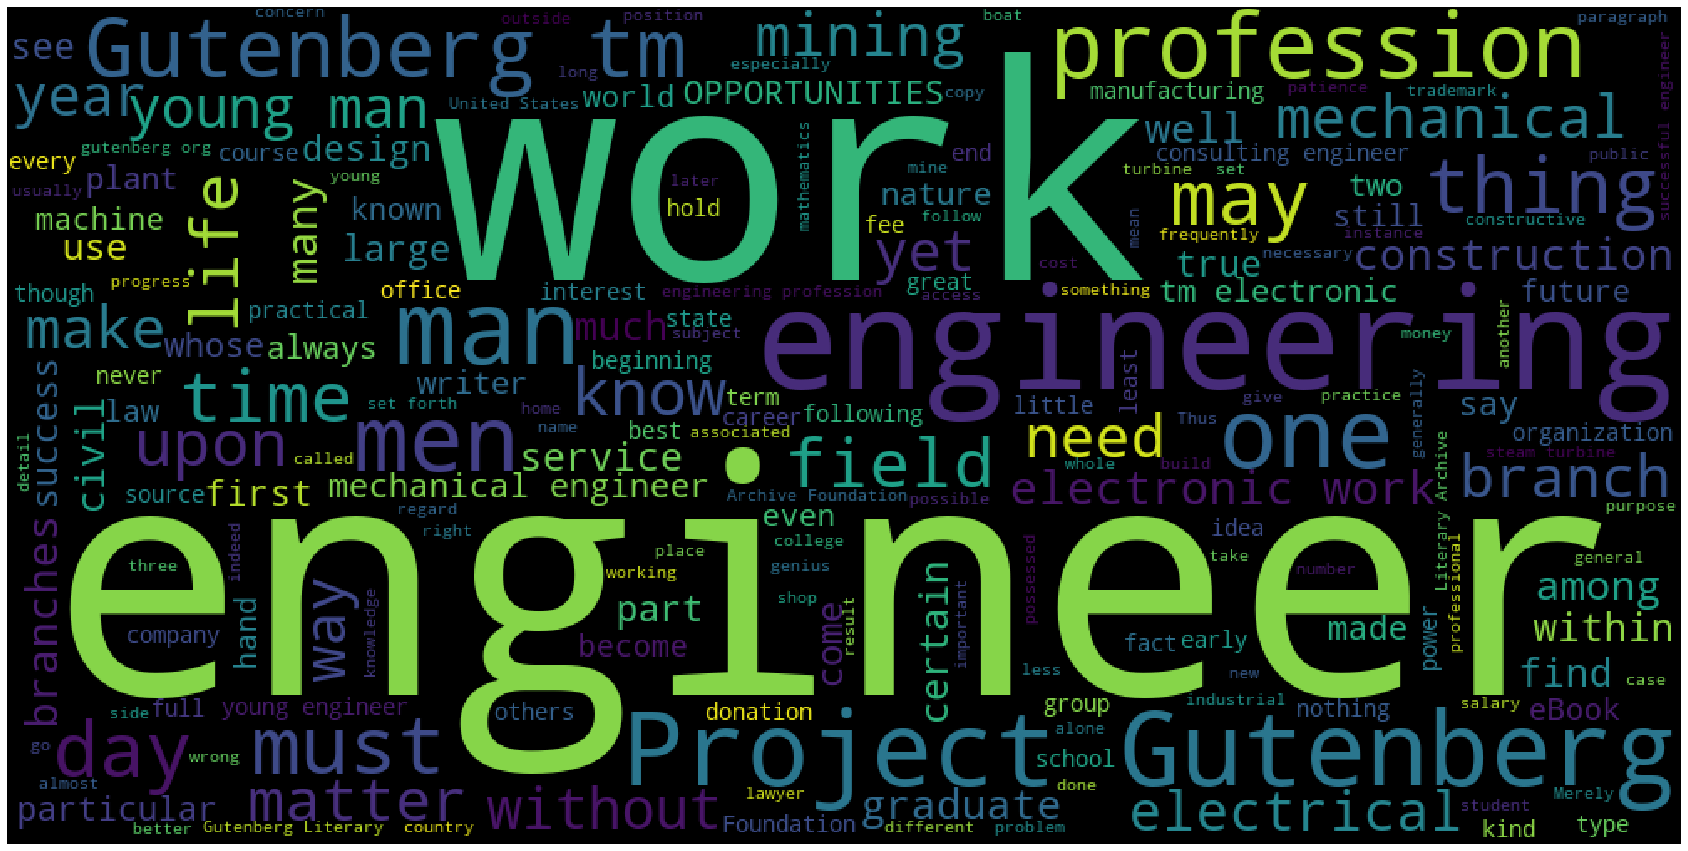

In [3]:
UNIQUE_STRING = (" ").join(wordsFiltered)
WORDCLOUD = WordCloud(width=1000, height=500).generate(UNIQUE_STRING)
plt.figure(figsize=(30, 16))
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.show()

# Histogram

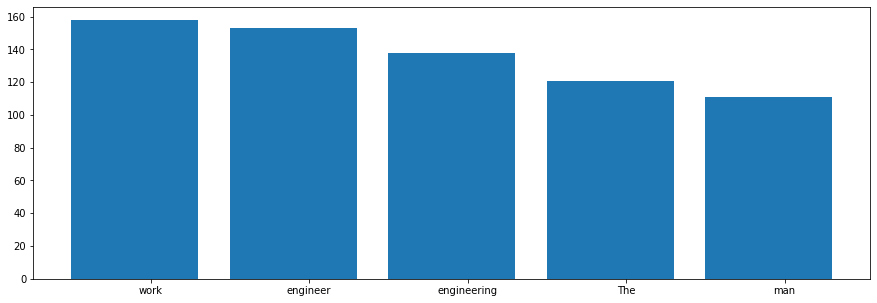

In [4]:
vocab_labels, vocab_values = zip(*Counter(wordsFiltered).items())  
                                                                                                                                                           
sorted_values = sorted(vocab_values)[::-1]
sorted_labels = [x for (y,x) in sorted(zip(vocab_values,vocab_labels))][::-1]  
indexes = np.arange(len(sorted_labels[:5]))                                    
width = 1                                                                                                                                                

plt.figure(figsize=(15, 5))
plt.bar(indexes, sorted_values[:5])
plt.xticks(indexes + width * 0.1, sorted_labels[:5])                                                                                    
plt.show()

# Wordoccureny in sentences

In [8]:
text = nltk.Text(wordsFiltered)
text_choosen = text.concordance(random.choice(text))

Displaying 13 of 13 matches:
acher time The thing mistaken The successful engineer must possessed certain f
vidence gift young man well armed successful career profession He like mathema
rritably marked mental effort The successful engineer must man likes shape thi
oung man necessary qualifications successful engineer He may never I say engin
try always quite successfully The successful engineer possessed certain spirit
fingers broad palm appear feature successful engineer Of course exceptions exc
 cases come writer 's observation successful engineer hands shaping He likewis
rposes book shall confine average successful man engineering Thus roughly engi
e detail construction The average successful engineer man interested shaping d
stuff thing makes human greatness successful two men I designer privileged wor
gle engineer gift imagination The successful engineer precious endowments poss
inges closely engineer must would successful engineer much world control comes
ped expense side Not en

# Lexical dispersion plot

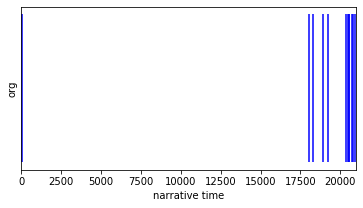

In [13]:
WORD = (random.choice(wordsFiltered))

x=list()
for i in range(0,len(words)):
    if words[i] == WORD:
        x.append(i)

fig, ax = plt.subplots()
ax.vlines(x, 0, 1, edgecolor="blue")
ax.set_xlim([0, len(words)])
ax.set_xlabel('narrative time')
ax.set_xticks([0],minor=True)
ax.set_ylabel(WORD)
ax.set_yticks([])
fig.set_figheight(3)

# Searching for word occurencies

In [ ]:
wordsFiltered.sort()

spec_letter = input("Your letter/sequence is: ")

print('\n')

for word in wordsFiltered:
    if spec_letter in word:
        print (word)

# Close file

In [ ]:
RESPONSE.close()